In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [5]:
data = pd.read_csv("../Datasets/FuelConsumption.csv")
cdf = data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [6]:
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


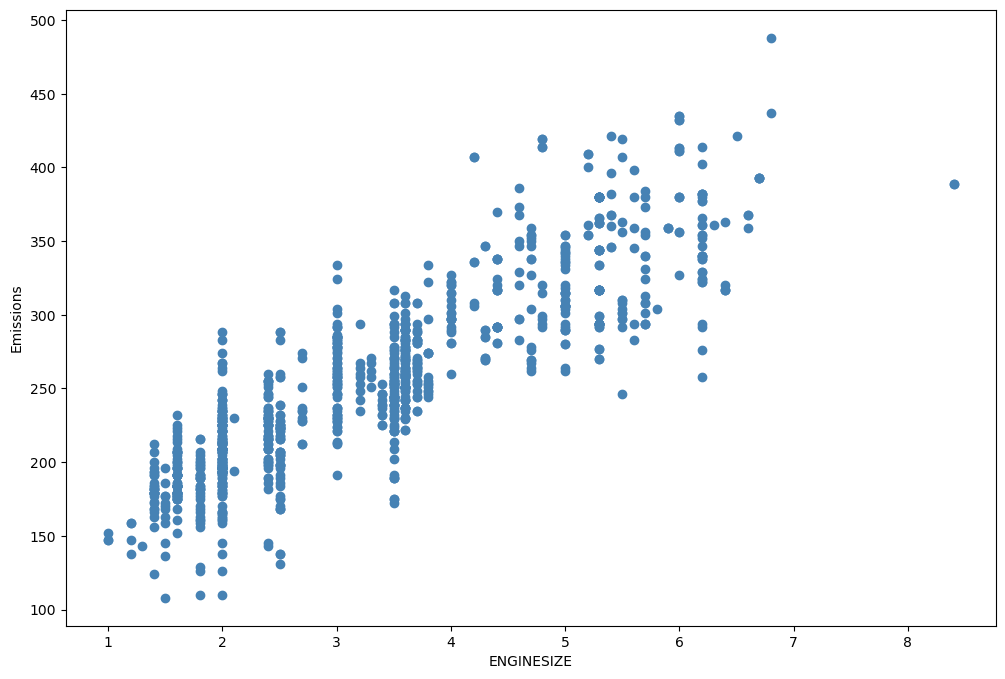

In [7]:
plt.rcParams['figure.figsize'] = (12,8)

plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="steelblue")
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2)

*In polynomial regression, the relationship between the independent variable x and the dependent variable y is modeled as nth degree polynomial in x.
2nd degree: y = θ0 + θ1 x + θ2 x^2

For example, the original feature set has only one feature: ENGINESIZE If we select the degree of the polynomial to be 2: It generates 3 features: degree=0, degree=1, degree=2

In [9]:
from sklearn.preprocessing import PolynomialFeatures

train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])

test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])

poly = PolynomialFeatures(degree=2)

In [10]:
train_x_poly = poly.fit_transform(train_x)

print(train_x_poly)

[[ 1.    1.8   3.24]
 [ 1.    2.    4.  ]
 [ 1.    2.5   6.25]
 ...
 [ 1.    1.8   3.24]
 [ 1.    3.5  12.25]
 [ 1.    2.4   5.76]]


Transformed data looks like feature sets of multiple linear regression analysis.
2nd degree quation would be turn into: y = θ0 + θ1 x1 + θ2 x2

Polynomial regression is a special case of linear regression, with selection your features.

In [11]:
from sklearn import linear_model

clf = linear_model.LinearRegression()

In [12]:
train_y_ = clf.fit(train_x_poly, train_y)

# The coefficients
print("Coefficients:", clf.coef_)
print("Intercept:", clf.intercept_)

Coefficients: [[ 0.         50.96032713 -1.62085593]]
Intercept: [107.12185021]


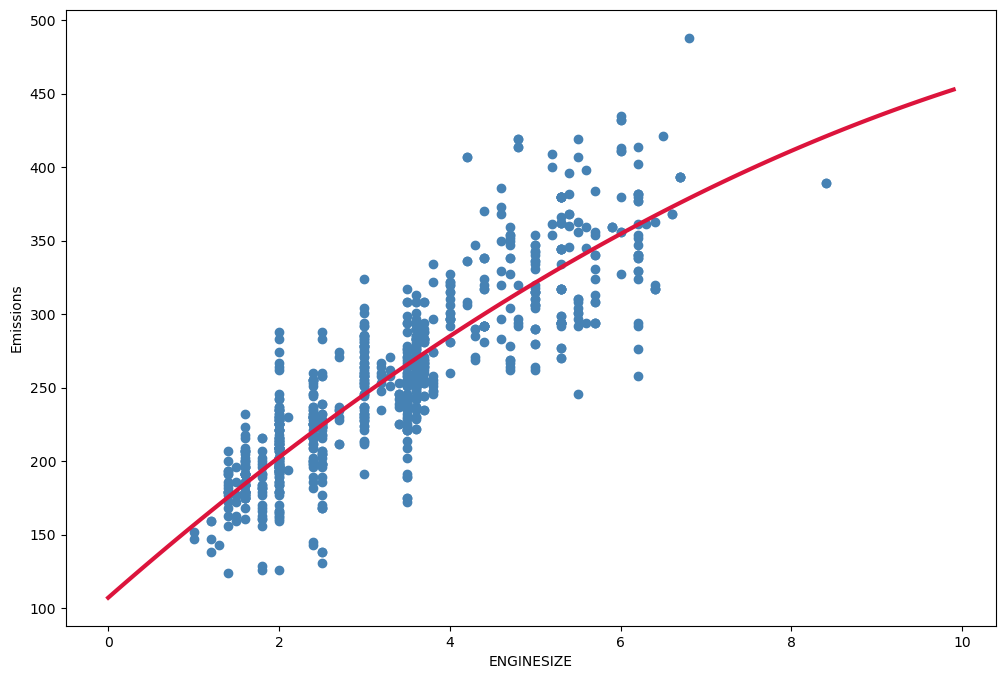

In [13]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="steelblue")
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0] + clf.coef_[0][1] * XX + clf.coef_[0][2] * np.power(XX, 2)
plt.plot(XX, yy, "crimson", linewidth=3)
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

In [14]:
print(XX)
print(yy)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]
[107.12185021 112.20167436 117.2490814  122.26407132 127.24664411
 132.19679979 137.11453835 141.99985979 146.85276412 151.67325132
 156.46132141 161.21697437 165.94021022 170.63102895 175.28943056
 179.91541505 184.50898243 189.07013268 193.59886582 198.09518184
 202.55908073 206.99056251 211.38962718 215.75627472 220.09050514
 224.39231845 228.66171463 232.8986937  237.10325565 241.27540048
 245.41512819 249.52243879 253.59733226 257.63980862 261.64986785
 265.62750997 269.57273497 273.48554285 277.36593361 281.21390726
 285.02946378 288.81260319 292.56332547 296.28163064 299.96751869

# Evaluation

* Mean Absolute Error (MAE)
* Mean Squared Error (SME)
* R2-Score

In [15]:
from sklearn.metrics import r2_score

test_x_poly = poly.transform(test_x)
test_y_ = clf.predict(test_x_poly)

print(f"Mean Absolute Error (MAE): {np.mean(np.absolute(test_y_ - test_y)):.2f}")
print(f"Mean Squared Error (MSE): {np.mean((test_y_ - test_y) ** 2):.2f}")
print(f"R2-Score: {r2_score(test_y, test_y_):.2f}")

Mean Absolute Error (MAE): 23.35
Mean Squared Error (MSE): 915.99
R2-Score: 0.80


# Practice

Try to use a polynomial regression with the dataset but this time with degree three (cubic). Does it result in better accuracy?

In [17]:
poly_cubic = PolynomialFeatures(degree=3)

train_x_poly3 = poly_cubic.fit_transform(train_x)

print(train_x_poly3)

[[ 1.     1.8    3.24   5.832]
 [ 1.     2.     4.     8.   ]
 [ 1.     2.5    6.25  15.625]
 ...
 [ 1.     1.8    3.24   5.832]
 [ 1.     3.5   12.25  42.875]
 [ 1.     2.4    5.76  13.824]]


In [18]:
train_y_poly3 = clf.fit(train_x_poly3, train_y)

# The coefficients
print("Coefficients:", clf.coef_)
print("Intercept:", clf.intercept_)

Coefficients: [[ 0.         28.16901934  4.60908036 -0.51269734]]
Intercept: [131.56268679]


In [19]:
test_x_poly3 = poly_cubic.transform(test_x)
test_y_poly3 = clf.predict(test_x_poly3)

print(f"Mean Absolute Error (MAE): {np.mean(np.absolute(test_y_poly3 - test_y)):.2f}")
print(f"Mean Squared Error (MSE): {np.mean((test_y_poly3 - test_y) ** 2):.2f}")
print(f"R2-Score: {r2_score(test_y_poly3, test_y_):.2f}")

Mean Absolute Error (MAE): 23.29
Mean Squared Error (MSE): 915.53
R2-Score: 1.00
